   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414
              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5
Імена стовпців: Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')
Кількість унікальних імен: 93889
Кількість унікальних імен у кожному році:
 Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010   

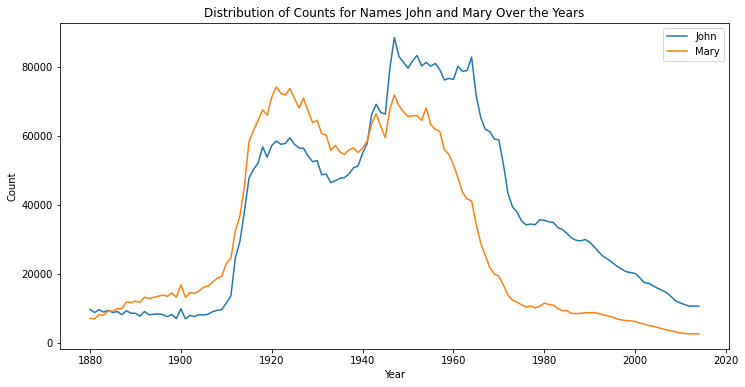

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'D:\Навчання\ХПІ\Pyton\L2\NationalNames.csv'
df = pd.read_csv(file_path)

# 1 Виведіть перші 8 рядків фрейму даних
print(df.head(8))

# 2 Виведіть останні 8 рядків фрейму даних
print(df.tail(8))

# 3 Отримайте імена стовпців набору даних
column_names = df.columns
print("Імена стовпців:", column_names)

# 4 Знайдіть кількість унікальних імен у наборі даних
unique_names_count = df['Name'].nunique()
print("Кількість унікальних імен:", unique_names_count)

# 10 Підрахуйте кількість унікальних імен у кожному році
unique_names_by_year = df.groupby('Year')['Name'].nunique()
print("Кількість унікальних імен у кожному році:\n", unique_names_by_year)

# 11 Знайдіть рік із найбільшою кількістю унікальних імен.
year_with_most_unique_names = unique_names_by_year.idxmax()
print("Рік із найбільшою кількістю унікальних імен:", year_with_most_unique_names)

# 12 Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен.
most_popular_name_in_year = df[df['Year'] == year_with_most_unique_names]['Name'].mode().values[0]
print("Найпопулярніше ім’я у", year_with_most_unique_names, "році:", most_popular_name_in_year)

# 13 Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен.
most_popular_year_for_jacob_girls = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]['Year'].mode().values[0]
print("Рік, коли ім’я 'Jacob' було найпопулярнішим серед жіночих імен:", most_popular_year_for_jacob_girls)

# 14 Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена).
neutral_names_by_year = df.groupby('Year')['Name'].nunique()
year_with_most_neutral_names = neutral_names_by_year.idxmax()
print("Рік із найбільшою кількістю гендерно нейтральних імен:", year_with_most_neutral_names)

# 15 Знайдіть загальну кількість народжень за рік.
total_births_by_year = df.groupby('Year')['Count'].sum()
print("Загальна кількість народжень за кожен рік:\n", total_births_by_year)

# 16 Знайдіть рік, коли народилося найбільше дітей.
year_with_most_births = total_births_by_year.idxmax()
print("Рік, коли народилося найбільше дітей:", year_with_most_births)

# 17 Знайдіть кількість дівчаток та хлопчиків, які народились кожного року.
gender_counts_by_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print("Кількість дівчаток та хлопчиків, які народились кожного року:\n", gender_counts_by_year)

# 18 Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.
years_more_girls_than_boys = (gender_counts_by_year['F'] > gender_counts_by_year['M']).sum()
print("Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків:", years_more_girls_than_boys)

# 21 Порахуйте, скільки разів хлопчиків називали Barbara.
barbara_count_for_boys = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()
print("Кількість разів, коли хлопчиків називали Barbara:", barbara_count_for_boys)

# 22 Підрахуйте скільки років проводилось спостереження.
observation_years = df['Year'].nunique()
print("Кількість років проведення спостереження:", observation_years)

# 23 Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року).
gender_counts_each_year = df.groupby(['Year', 'Name'])['Gender'].nunique()
neutral_names = gender_counts_each_year[gender_counts_each_year == 2].reset_index()
top_neutral_names = neutral_names.groupby('Name')['Gender'].count().nlargest(15).index
print("Топ 15 найпопулярніших гендерно-нейтральних імен (присутні кожного року):")
print(top_neutral_names)
most_popular_unpopular_name = df.groupby('Name')['Count'].sum().idxmax()
print("Найпопулярніше серед непопулярних імен:", most_popular_unpopular_name)

# 25 Побудувати графіки розподілення кількості імен John та Mary по роках без залежності від статі.
john_counts_by_year = df[df['Name'] == 'John'].groupby('Year')['Count'].sum()
mary_counts_by_year = df[df['Name'] == 'Mary'].groupby('Year')['Count'].sum()

plt.figure(figsize=(12, 6))
plt.plot(john_counts_by_year.index, john_counts_by_year.values, label='John')
plt.plot(mary_counts_by_year.index, mary_counts_by_year.values, label='Mary')
plt.title('Distribution of Counts for Names John and Mary Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()